In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

from utils import *
from model import *

In [2]:
device = get_default_device()

In [3]:
normal = pd.read_csv('data/swat_normal.csv')

normal

C:\Users\유근태\AppData\Local\Temp\ipykernel_6148\3425973827.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv('data/swat_normal.csv')


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0,"124,3135",1,1,1,"251,9226","8,313446","312,7916",0,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
1,22/12/2015 4:30:01 PM,0,"124,392",1,1,1,"251,9226","8,313446","312,7916",0,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
2,22/12/2015 4:30:02 PM,0,"124,4705",1,1,1,"251,9226","8,313446","312,7916",0,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
3,22/12/2015 4:30:03 PM,0,"124,6668",1,1,1,"251,9226","8,313446","312,7916",0,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
4,22/12/2015 4:30:04 PM,0,"124,5098",1,1,1,"251,9226","8,313446","312,7916",0,...,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494995,28/12/2015 9:59:55 AM,"2,460366","523,043",2,2,1,"262,0161","8,396437","328,5055","2,442316",...,2,1,"250,8171","1,778105","189,8552","0,0001281517",1,1,1,Normal
494996,28/12/2015 9:59:56 AM,"2,448836","522,9645",2,2,1,"262,0161","8,396437","328,5055","2,442316",...,2,1,"250,8171","1,778105","189,5027","0,0001281517",1,1,1,Normal
494997,28/12/2015 9:59:57 AM,"2,434744","522,886",2,2,1,"262,0161","8,396437","328,6337","2,444879",...,2,1,"250,8171","1,778105","189,5027","0,0001281517",1,1,1,Normal
494998,28/12/2015 9:59:58 AM,"2,428338","522,9252",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8171","1,649953","189,5027","0,0001281517",1,1,1,Normal


In [4]:
list(normal)

['Timestamp',
 'FIT101',
 'LIT101',
 'MV101',
 'P101',
 'P102',
 'AIT201',
 'AIT202',
 'AIT203',
 'FIT201',
 'MV201',
 'P201',
 'P202',
 'P203',
 'P204',
 'P205',
 'P206',
 'DPIT301',
 'FIT301',
 'LIT301',
 'MV301',
 'MV302',
 'MV303',
 'MV304',
 'P301',
 'P302',
 'AIT401',
 'AIT402',
 'FIT401',
 'LIT401',
 'P401',
 'P402',
 'P403',
 'P404',
 'UV401',
 'AIT501',
 'AIT502',
 'AIT503',
 'AIT504',
 'FIT501',
 'FIT502',
 'FIT503',
 'FIT504',
 'P501',
 'P502',
 'PIT501',
 'PIT502',
 'PIT503',
 'FIT601',
 'P601',
 'P602',
 'P603',
 'Normal/Attack']

In [5]:
normal = normal.drop(['Timestamp', "Normal/Attack"], axis = 1)
normal.shape

(495000, 51)

In [6]:
for i in list(normal): # list(normal): 컬럼명
    normal[i] = normal[i].apply(lambda x: str(x).replace(',', '.'))
normal = normal.astype(float)

In [7]:
# downsampling
down_rate = 5

# 나누면 0, 0, 0, 0, 0 5개가 되므로 이거 groupby로 묶고, 그것에 평균을 함
normal = normal.groupby(np.arange(len(normal.index)) // down_rate).mean()


normal.shape

(99000, 51)

In [8]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

x = normal.values
x_scaled = scaler.fit_transform(x)

normal = pd.DataFrame(x_scaled)
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005241,0.5,0.0,0.0,0.008695,0.075126,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.003821,0.5,0.0,0.0,0.008695,0.074071,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


# Attack

In [10]:
#Read data
attack = pd.read_csv("data/swat_attack.csv",sep=";")#, nrows=1000)
labels = [ float(label!= 'Normal' ) for label  in attack["Normal/Attack"].values] # False가 0으로, True가 1이 된다.  (y 값)


C:\Users\유근태\AppData\Local\Temp\ipykernel_6148\4126505425.py:2: DtypeWarning: Columns (1,9,28,46) have mixed types. Specify dtype option on import or set low_memory=False.
  attack = pd.read_csv("data/swat_attack.csv",sep=";")#, nrows=1000)


In [11]:
attack = attack.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)

for i in list(attack):
    attack[i] = attack[i].apply(lambda x: str(x).replace(',', '.'))

attack = attack.astype(float)

attack = attack.groupby(np.arange(len(attack.index)) // down_rate).mean()

x = attack.values 
x_scaled = scaler.transform(x)
attack = pd.DataFrame(x_scaled)

attack.head(2)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.917606,0.577402,1.0,1.0,0.0,0.49767,0.187329,0.064088,0.982593,1.0,...,0.975713,1.0,0.0,0.946163,0.484022,0.944197,0.000074,0.0,0.0,0.0
1,0.971946,0.579048,1.0,1.0,0.0,0.49767,0.186274,0.064088,0.982202,1.0,...,0.976686,1.0,0.0,0.945687,0.484022,0.943694,0.000074,0.0,0.0,0.0


In [12]:
# downsampling

labels_down = []

for i in range(len(labels)//down_rate):
    if labels[5 * i : 5 * (i + 1)].count(1.0):
        labels_down.append(1.0)
    else:
        labels_down.append(0.0)

if labels[down_rate * (i + 1): ].count(1.0):
    labels_down.append(1.0)
else:
    labels_down.append(0.0)

print(len(labels_down))
    

89984


# Windows

In [13]:
window_size = 12 # 논문 기준 K 값

In [14]:
# (1, 12)랑 (98988, 1)을 broadcasing해서 더함
# [0,1,2, .., 12]랑 0을 해서 첫번째 값 [0+0, 0+1, 0+2, .., 0+12]

windows_normal= normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(98988, 12, 51)

In [15]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(89972, 12, 51)

# Training

In [16]:
import torch.utils.data as data_utils


BATCH_SIZE = 7919
N_EPOCHS = 70 # 원래 25
hidden_size = 40

w_size = windows_normal.shape[1] * windows_normal.shape[2] # 12 * 51 = 612
z_size = windows_normal.shape[1] * hidden_size # 12 * 40 = 480 (잠재벡터)

windows_normal_train = windows_normal[:int(np.floor(.8 * windows_normal.shape[0]))] # np.floor: 소수 부분을 버리고 주어진 수보다 같거나 적은 정수로
windows_normal_val = windows_normal[int(np.floor(.8 * windows_normal.shape[0])):]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0], w_size]))
),
batch_size=BATCH_SIZE,
shuffle=False,
num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0], w_size]))
),
batch_size=BATCH_SIZE,
shuffle=False,
num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0], w_size]))
),
batch_size=BATCH_SIZE,
shuffle=False,
num_workers=0
)

model = USAD_model(w_size, z_size)
model = to_device(model,device)



In [17]:
history = training(N_EPOCHS, model, train_loader, val_loader)

Epoch [0], val_loss1: 0.0468, val_loss2: 0.0455
Epoch [1], val_loss1: 0.0425, val_loss2: -0.0010
Epoch [2], val_loss1: 0.0354, val_loss2: -0.0126
Epoch [3], val_loss1: 0.0324, val_loss2: -0.0170
Epoch [4], val_loss1: 0.0331, val_loss2: -0.0207
Epoch [5], val_loss1: 0.0330, val_loss2: -0.0232
Epoch [6], val_loss1: 0.0330, val_loss2: -0.0246
Epoch [7], val_loss1: 0.0345, val_loss2: -0.0269
Epoch [8], val_loss1: 0.0333, val_loss2: -0.0268
Epoch [9], val_loss1: 0.0322, val_loss2: -0.0264
Epoch [10], val_loss1: 0.0324, val_loss2: -0.0271
Epoch [11], val_loss1: 0.0319, val_loss2: -0.0271
Epoch [12], val_loss1: 0.0316, val_loss2: -0.0273
Epoch [13], val_loss1: 0.0329, val_loss2: -0.0287
Epoch [14], val_loss1: 0.0318, val_loss2: -0.0281
Epoch [15], val_loss1: 0.0375, val_loss2: -0.0335
Epoch [16], val_loss1: 0.0357, val_loss2: -0.0321
Epoch [17], val_loss1: 0.0339, val_loss2: -0.0307
Epoch [18], val_loss1: 0.0374, val_loss2: -0.0341
Epoch [19], val_loss1: 0.0364, val_loss2: -0.0333
Epoch [20],

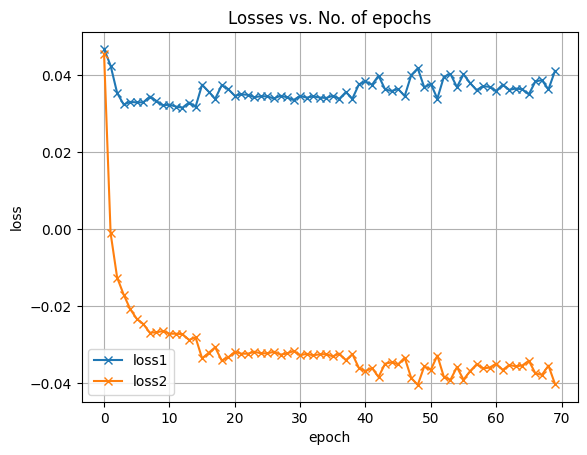

In [18]:
plot_history(history)

# 모델 저장

In [19]:
# 모델 저장
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_SWaT.pth")

In [20]:
checkpoint = torch.load("model_SWaT.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [21]:
training_scores_list = training_scores(model, train_loader, val_loader)

In [22]:
training_scores_concat=np.concatenate([torch.stack(training_scores_list[:-1]).flatten().detach().cpu().numpy(),
                            training_scores_list[-1].flatten().detach().cpu().numpy()])

training_scores_concat

array([0.28914142, 0.28915775, 0.28917307, ..., 0.01912818, 0.01913153,
       0.01908361], dtype=float32)

In [23]:
results = testing_scores(model, test_loader) # testing

In [24]:
windows_labels=[]

for i in range(len(labels_down)-window_size):
    windows_labels.append(list(np.int_(labels_down[i:i+window_size])))

In [25]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels]

In [26]:

y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                            results[-1].flatten().detach().cpu().numpy()])

In [27]:

results_threshold= testing_threshold(model,test_loader,alpha=.5, beta=.5, contamination=0.10)

In [28]:

results_threshold

np.float32(0.44985375)

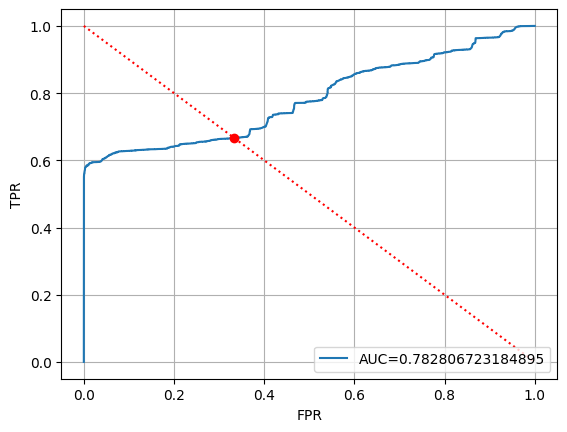

In [29]:
threshold=ROC(y_test,y_pred)

In [30]:

threshold=results_threshold # Decide on your own threshold
y_pred_label = [1.0 if (score > threshold) else 0 for score in y_pred ]

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

prec = precision_score(y_test, y_pred_label, pos_label=1)
recall = recall_score(y_test, y_pred_label, pos_label=1)
f1 = f1_score(y_test, y_pred_label, pos_label=1)

print('precision =', prec)
print('recall =', recall)
print('f1 =', f1)


precision = 0.7491386017561409
recall = 0.5947758559830568
f1 = 0.663092134389296


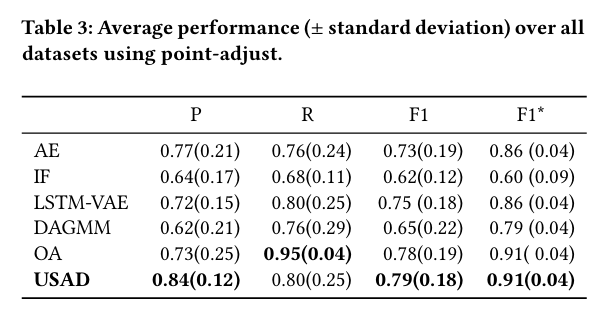